In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten
from keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [ ]:
train = pd.read_csv("/content/train.csv")
test_images = (pd.read_csv("/content/test.csv").values).astype('float32')

In [ ]:
train_images = (train.iloc[:, 1:].values).astype('float32')
train_labels = train['label'].values.astype('int32')

In [ ]:
train_labels

array([1, 0, 1, ..., 7, 6, 9], dtype=int32)

In [ ]:
train_images.shape

(42000, 784)

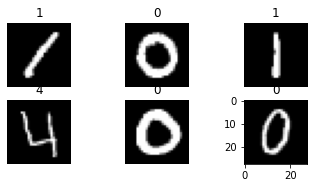

In [ ]:
train_images = train_images.reshape(train_images.shape[0], 28, 28)

for i in range(0,6):
    plt.axis("off")
    plt.subplot(330 + (i+1))
    plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
    plt.title(train_labels[i])

In [ ]:
train_images = train_images.reshape((42000, 28 * 28))

In [ ]:
train_labels

array([1, 0, 1, ..., 7, 6, 9], dtype=int32)

In [ ]:
train_images = train_images/255
test_images = test_images/255

In [ ]:
from keras.utils.np_utils import to_categorical
train_labels = to_categorical(train_labels)
num_classes = train_labels.shape[1]
num_classes

10

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


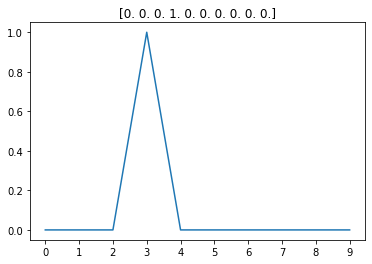

In [ ]:
plt.title(train_labels[9])
plt.plot(train_labels[9])
plt.xticks(range(10));

In [ ]:
seed = 43
np.random.seed(seed)
train_images.shape

(42000, 784)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=(28*28)))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

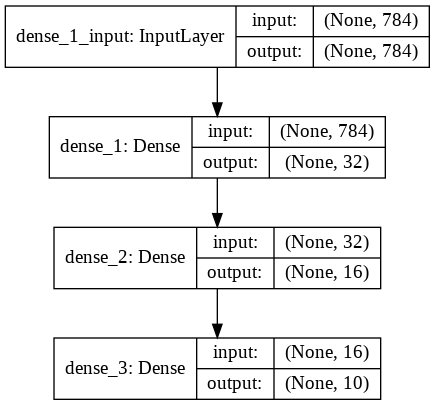

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

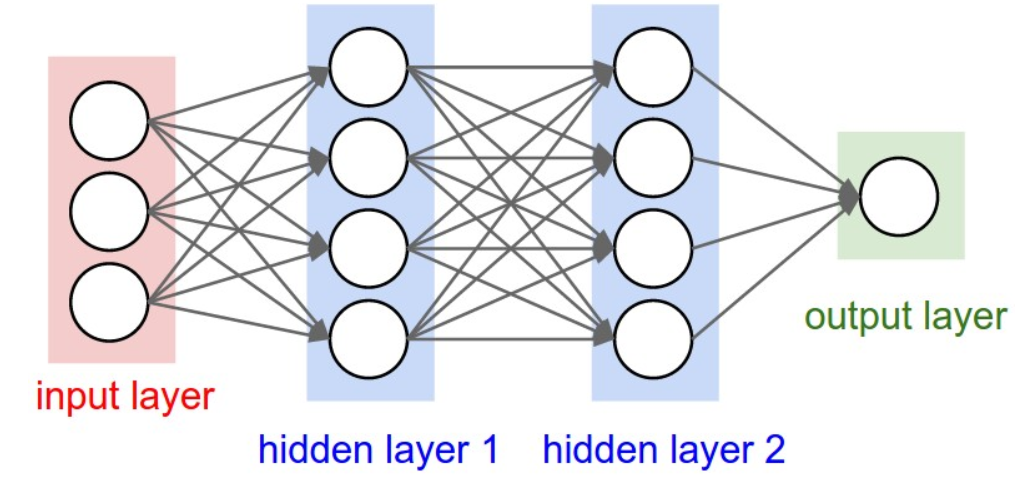

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
batch_size = 64
num_classes = 10
epochs = 20
input_shape = (28, 28, 1)
train_images = train_images.reshape(train_images.shape[0], 28, 28,1)



In [ ]:
test_images = pd.read_csv("/content/test.csv")
test_images = (test_images.iloc[:, :].values).astype('float32')
test_images = test_images.reshape(test_images.shape[0], 28, 28,1)


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.20))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15, # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [ ]:

X_train, X_val, Y_train, Y_val = train_test_split(train_images, train_labels, test_size = 0.1, random_state=42)
datagen.fit(X_train)
h = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction],)

Epoch 1/20
590/590 [==============================] - 141s 239ms/step - loss: 0.3351 - accuracy: 0.8933 - val_loss: 0.0616 - val_accuracy: 0.9821
Epoch 2/20


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


590/590 [==============================] - 142s 241ms/step - loss: 0.1091 - accuracy: 0.9659 - val_loss: 0.0392 - val_accuracy: 0.9876
Epoch 3/20
590/590 [==============================] - 140s 237ms/step - loss: 0.0810 - accuracy: 0.9757 - val_loss: 0.0300 - val_accuracy: 0.9898
Epoch 4/20
590/590 [==============================] - 140s 238ms/step - loss: 0.0709 - accuracy: 0.9782 - val_loss: 0.0303 - val_accuracy: 0.9926
Epoch 5/20
590/590 [==============================] - 140s 237ms/step - loss: 0.0606 - accuracy: 0.9814 - val_loss: 0.0211 - val_accuracy: 0.9926
Epoch 6/20
590/590 [==============================] - 141s 238ms/step - loss: 0.0571 - accuracy: 0.9827 - val_loss: 0.0270 - val_accuracy: 0.9917
Epoch 7/20
590/590 [==============================] - 140s 238ms/step - loss: 0.0517 - accuracy: 0.9840 - val_loss: 0.0252 - val_accuracy: 0.9926
Epoch 8/20
590/590 [==============================] - 140s 238ms/step - loss: 0.0483 - accuracy: 0.9855 - val_loss: 0.0269 - val_accura

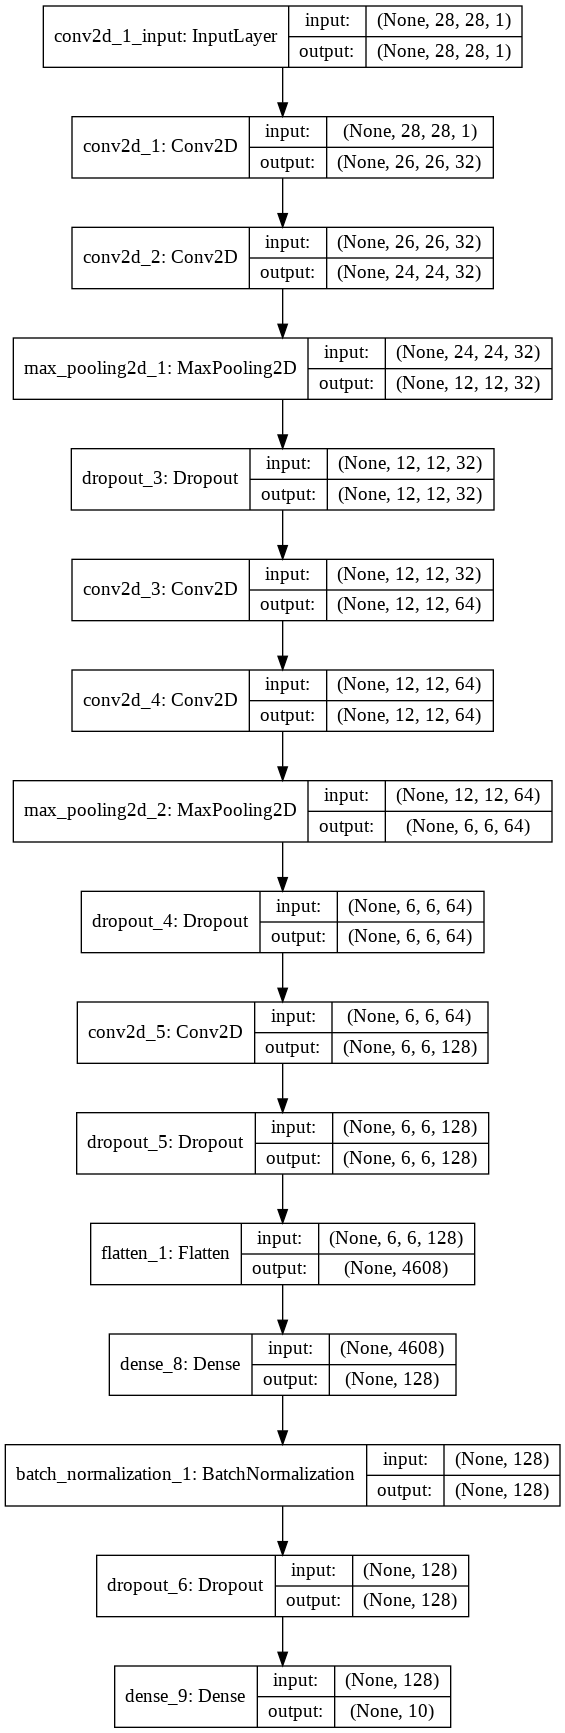

In [ ]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [ ]:


final_loss, final_acc = model.evaluate(X_val, Y_val, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 0.023037, final accuracy: 0.992619


In [ ]:
predictions = model.predict_classes(test_images, verbose=0)
submissions=pd.DataFrame({'ImageId':list(range(1,len(predictions) + 1)), "Label": predictions})
submissions.to_csv("DR.csv", index=False, header=True)